# import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

C:\Users\caban\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\caban\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# read file

In [2]:
all_df = pd.read_csv('C:/Users/caban/Desktop/data_science/Naver_Data_Competition_2018/project/german_credit/동형이.csv')

In [3]:
all_df.head()

,﻿Class,DM_status(Q)_A11,DM_status(Q)_A12,DM_status(Q)_A13,DM_status(Q)_A14,Duration(N),Credit_history(Q)_A30,Credit_history(Q)_A31,Credit_history(Q)_A32,Credit_history(Q)_A33,...,Housing(Q)_A152,Job(Q)_A171,Job(Q)_A172,Job(Q)_A173,Job(Q)_A174,Telephone(Q)_A191,Telephone(Q)_A192,Foreign_worker(Q)_A201,Foreign_worker(Q)_A202,Age in years
0,1,1,0,0,0,6,0,0,0,0,...,1,0,0,1,0,0,1,1,0,67
1,2,0,1,0,0,48,0,0,1,0,...,1,0,0,1,0,1,0,1,0,22
2,1,0,0,0,1,12,0,0,0,0,...,1,0,1,0,0,1,0,1,0,49
3,1,1,0,0,0,42,0,0,1,0,...,0,0,0,1,0,1,0,1,0,45
4,2,1,0,0,0,24,0,0,0,1,...,0,0,0,1,0,1,0,1,0,53


# data handling

In [4]:
y_series = all_df['﻿Class']

In [5]:
all_df.drop(['﻿Class', 'Age in years'], axis=1, inplace=True)

In [6]:
all_df['Credit_amount(N)'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit_amount(N), dtype: float64

In [7]:
all_df['Credit_amount(N)'] = np.log(all_df['Credit_amount(N)'])

In [8]:
all_df['Credit_amount(N)'].describe()

count    1000.000000
mean        7.788691
std         0.776474
min         5.521461
25%         7.219276
50%         7.749107
75%         8.287088
max         9.821409
Name: Credit_amount(N), dtype: float64

In [9]:
continuous_df = pd.DataFrame(data = all_df[['Credit_amount(N)', 'Duration(N)']])

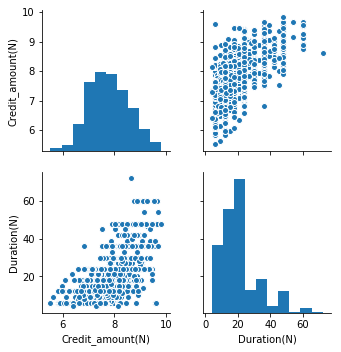

In [10]:
sns.pairplot(continuous_df)

In [11]:
continuous_df.corr()

,Credit_amount(N),Duration(N)
Credit_amount(N),1.000000,0.640814
Duration(N),0.640814,1.000000


In [12]:
continuous_vif = 1 / (1 - (0.640814**2))

In [13]:
continuous_vif

1.6967632381803175

# Logistic regression (L1 regularization)

In [14]:
train_X, test_X, train_y, test_y = train_test_split(all_df, y_series, test_size=0.2)

In [15]:
regr = LogisticRegression(fit_intercept = True, penalty='l1', intercept_scaling = 5)

In [16]:
regr.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=5, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
regr.coef_

array([[ 0.42841879,  0.        , -0.64419867, -1.12405297,  0.03896569,
         0.59195369,  0.37664974, -0.21102275,  0.        , -0.8586429 ,
         0.69192939, -0.76736874, -0.16055702,  0.        , -0.05198147,
         0.        ,  0.43132522,  0.71745449,  0.        ,  0.        ,
         0.08585971,  0.35657814,  0.        ,  0.        , -0.42955414,
        -0.28204888,  0.02696442,  0.28702377,  0.        , -0.50394823,
        -0.29156808, -0.60767456, -0.3300631 ,  0.        ,  0.09709056,
         0.        , -0.36605052,  0.        ,  0.07973237, -0.48134886,
        -0.25311721,  0.        ,  0.1149741 ,  0.        , -0.58567196,
         0.        , -0.35128733,  0.        ,  0.        ,  0.02049526,
         0.        ,  0.        , -0.28000754,  0.        , -0.98303667]])

In [18]:
regr.intercept_

array([-0.81307711])

In [19]:
pred = regr.predict(test_X)

In [20]:
regr.score(test_X, test_y)

0.735

In [21]:
confusion_matrix(test_y, pred)

array([[122,  16],
       [ 37,  25]], dtype=int64)

# tree based model function

In [22]:
def fit_trees(algo, n_jobs, max_depth, n_estimators): 
    if algo == "Decision Trees": 
        estimator = DecisionTreeClassifier(criterion = 'entropy')
    else:
        estimator = RandomForestClassifier(criterion = 'entropy')
        
    cv = ShuffleSplit(train_X.shape[0], n_iter=10, test_size=0.2) 
        
    if algo == "Decision Trees": 
        classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=dict(max_depth=max_depth), n_jobs=n_jobs, scoring='f1')
    else: 
        classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=dict(n_estimators=n_estimators, max_depth=max_depth), n_jobs=n_jobs, scoring='f1')
            
    classifier.fit(train_X, train_y)
    
    print ("Best Estimator learned through GridSearch")
    print (classifier.best_estimator_) 
    
    return cv, classifier.best_estimator_.max_depth, classifier.best_estimator_.n_estimators
    

# random forest

In [23]:
max_depth = np.linspace(5, 10, 5)

In [24]:
n_estimators = [10, 100, 500, 1000] 

In [25]:
cv,max_depth,n_estimators=fit_trees('Random Forests', n_jobs=10, max_depth=max_depth, n_estimators=n_estimators) 

Best Estimator learned through GridSearch
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6.25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [26]:
estimator = RandomForestClassifier(max_depth = max_depth, n_estimators = n_estimators, n_jobs=10, criterion='entropy')

In [27]:
estimator.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6.25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=10,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
pred = estimator.predict(test_X)

In [29]:
confusion_matrix(test_y, pred)

array([[134,   4],
       [ 49,  13]], dtype=int64)

In [30]:
print(classification_report(test_y, pred))

             precision    recall  f1-score   support

          1       0.73      0.97      0.83       138
          2       0.76      0.21      0.33        62

avg / total       0.74      0.73      0.68       200



In [31]:
accuracy_score(test_y, pred)

0.735

# decision tree

In [32]:
max_depth = np.linspace(5, 10, 5)

In [33]:
n_estimators = [10, 100, 500, 1000]

In [34]:
cv,max_depth,n_estimators=fit_trees('Decision Trees', n_jobs=10, max_depth=max_depth, n_estimators=False ) 

Best Estimator learned through GridSearch
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7.5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


AttributeError: 'DecisionTreeClassifier' object has no attribute 'n_estimators'

In [35]:
estimator = DecisionTreeClassifier(max_depth = max_depth)

In [36]:
estimator.fit(train_X, train_y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# roc curve

In [38]:
from sklearn.metrics import roc_curve, auc

In [60]:
dummies = pd.get_dummies(test_y)

In [61]:
dummies.drop(1, axis=1, inplace=True)

In [62]:
test_y_1 = dummies

In [63]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y_1, pred)

In [64]:
roc_auc = auc(false_positive_rate, true_positive_rate)

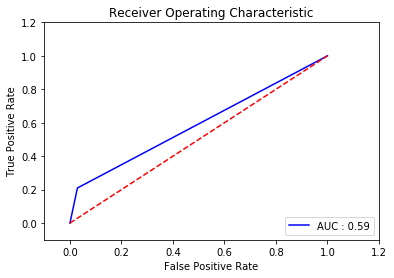

In [69]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label= 'AUC : %.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()